<a href="https://colab.research.google.com/github/Utkarsha1407/Machine-Learning-Projects/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment on Multilayer Neural Network Model
Download the dataset of National Institute of Diabetes and Digestive and Kidney Diseases from below link :
Data Set: https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians- diabetes.data.csv
The dataset has total 9 attributes where the last attribute is “Class attribute” having values 0 and 1. (1=”Positive for Diabetes”, 0=”Negative”)
a. Load the dataset in the program. Define the ANN Model with Keras. Define at least two hidden layers. Specify the ReLU function as activation function for the hidden layer and Sigmoid for the output layer.
b. Compile the model with necessary parameters. Set the number of epochs and batch size and fit the model.
c. Evaluate the performance of the model for different values of epochs and batch sizes.
d. Evaluate model performance using different activation functions Visualize the model using ANN Visualizer.


In [ ]:
 import pandas as pd
 import numpy as np
 import seaborn as sns

In [ ]:
df = pd.read_csv("/content/diabetes.csv")

In [ ]:
 df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [ ]:
 df.shape

(768, 9)

In [ ]:
 df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [ ]:
 x = df.iloc[:,:-1]
 y = df.iloc[:,-1]

In [ ]:
 x[:2]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31


In [ ]:
 y[:2]

,Outcome
0,1
1,0


<Axes: xlabel='Outcome', ylabel='count'>

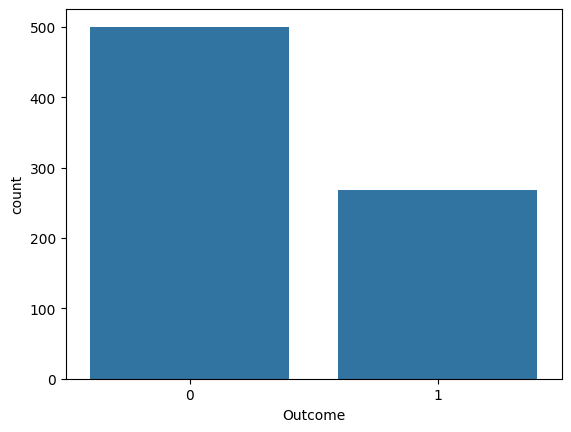

In [ ]:
 sns.countplot(x=y)

In [ ]:
 from imblearn.over_sampling import SMOTE

In [ ]:
 s =SMOTE()

In [ ]:
 x_sampled, y_sampled = s.fit_resample(x,y)

<Axes: xlabel='Outcome', ylabel='count'>

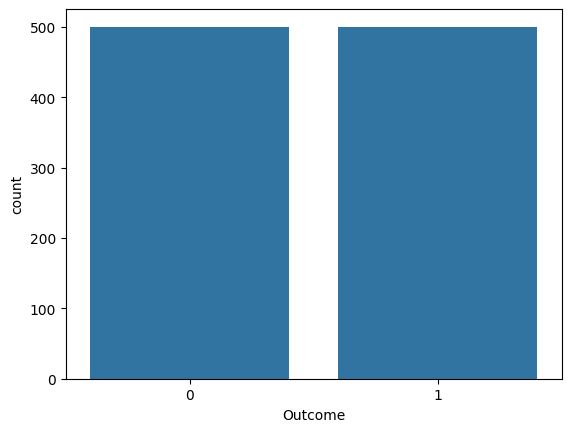

In [ ]:
 sns.countplot(x=y_sampled)

In [ ]:
 from sklearn.model_selection import train_test_split

In [ ]:
 x_train,x_test,y_train,y_test=train_test_split(x_sampled,y_sampled,train_size=0.85,random_state=41)

In [ ]:
 from sklearn.preprocessing import MinMaxScaler

In [ ]:
 scaler =MinMaxScaler()

In [ ]:
 x_train_scaled = scaler.fit_transform(x_train)

In [ ]:
x_test_scaled =scaler.transform(x_test)

In [ ]:
 import tensorflow.keras as tk

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
model = tk.Sequential()

In [ ]:
# Removed explicit Input layer as it's redundant when input_dim is set in the first Dense layer.

In [ ]:
 #first hidden layer
 model.add(tk.layers.Dense(units=8,
 activation="relu",
 kernel_initializer="he_uniform",
 input_dim=8))

In [ ]:
 #second hidden layer
 model.add(tk.layers.Dense(units=6,   activation="relu",
                          kernel_initializer="he_uniform"))

In [ ]:
 #output layer
 model.add(tk.layers.Dense(units=1,
                          activation="sigmoid",
                          kernel_initializer="he_uniform"))

In [ ]:
 model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["precision","accuracy"])

In [ ]:
 model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133 (532.00 B)

 Trainable params: 133 (532.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x=x_train_scaled,
          y=y_train,
          batch_size=32,
          epochs=30,
          verbose=1,
          validation_data=(x_test_scaled,y_test))

Epoch 1/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.4936 - loss: 0.8104 - precision: 0.4930 - val_accuracy: 0.5467 - val_loss: 0.6937 - val_precision: 0.5436
Epoch 2/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4870 - loss: 0.7154 - precision: 0.4870 - val_accuracy: 0.5733 - val_loss: 0.6768 - val_precision: 0.5669
Epoch 3/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5409 - loss: 0.6891 - precision: 0.5339 - val_accuracy: 0.5933 - val_loss: 0.6726 - val_precision: 0.5943
Epoch 4/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5956 - loss: 0.6700 - precision: 0.5737 - val_accuracy: 0.5733 - val_loss: 0.6711 - val_precision: 0.5914
Epoch 5/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5880 - loss: 0.6829 - precision: 0.5753 - val_accuracy: 0.5867 - val_loss: 0.6685 - val_precision: 0.6022
Epoch 6/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5964 - loss: 0.6776 - precision: 0.5540 - val_accuracy: 0.6267 - val_loss: 0.6673 - v

In [ ]:
 y_pred =model.predict(x_test_scaled)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [ ]:
y_pred[:5]

array([[0.54418296],
       [0.44676983],
       [0.7256504 ],
       [0.548839  ],
       [0.72534436]], dtype=float32)

In [ ]:
 model.evaluate(x_test_scaled,y_test,return_dict=True)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7113 - loss: 0.5882 - precision: 0.7687 


{'accuracy': 0.7066666483879089,
 'loss': 0.5930681228637695,
 'precision': 0.7228915691375732}

Text(0.5, 1.0, 'Model Performance')

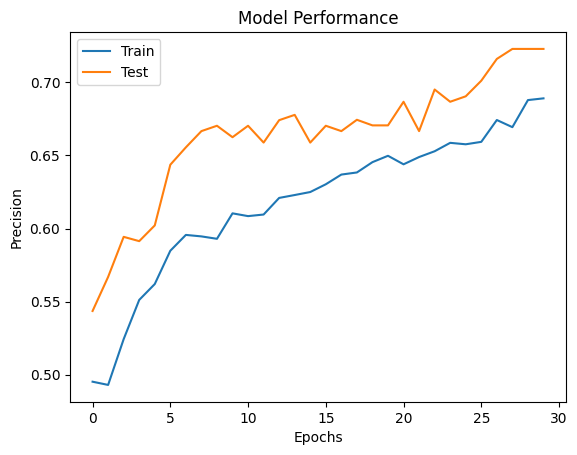

In [ ]:
 ax = sns.lineplot(history.history["precision"],label="Train")
 sns.lineplot(history.history["val_precision"],label="Test")
 ax.set_xlabel("Epochs")
 ax.set_ylabel("Precision")
 ax.set_title("Model Performance")

In [ ]:
scores = model.evaluate(x_test_scaled,y_test,verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

compile_metrics: 72.29%


Text(0.5, 1.0, 'Model Performance')

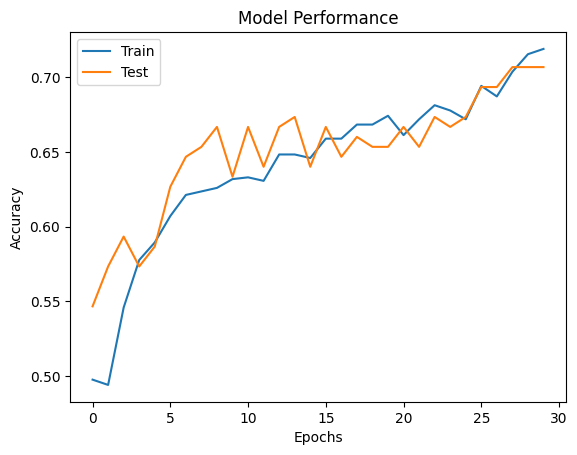

In [ ]:
 ax=sns.lineplot(history.history["accuracy"],label="Train")
 sns.lineplot(history.history["val_accuracy"],label="Test")
 ax.set_xlabel("Epochs")
 ax.set_ylabel("Accuracy")
 ax.set_title("Model Performance")